# Image Recognition with Logistic Regression
> Based on Coursera Machine Learning course assignments.

See *Logistic Regression* notebook for details first.

In [1]:
import sys
sys.path.append("../")

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from logistic_regression import *
from image_recognition import *
from neural_network import *

In [3]:
# load and prepare data
def load_data():
    data = scipy.io.loadmat('../data/ex3data1.mat')
    x = data['X']  # m x n^2, where m - experiments count, n - square image size
    y = data['y']  # m x 1 vector of image classes (numbers 0 - 9)

    return x, y

x, y = load_data()

def one_vs_all(y, digit):
    # replace 10 with 0
    return (y == (10 if digit == 0 else digit)).astype(int)

Using one-vs-all approach with 10 logistic regression classifiers for each digit.

In [4]:
# %load -s learn ../logistic_regression.py
def learn(x, y, regularization_rate):
    x = np.hstack((np.ones(x.shape[0]).reshape(x.shape[0], 1), x))

    return optimize.fmin_cg(regularized_cost_function,
                            np.zeros(x.shape[1]),
                            fprime=regularized_cost_function_derivative,
                            args=(x, y, regularization_rate),
                            maxiter=50,
                            disp=False)


In [5]:
# learn logistic regression coefficients for all digits
regularization_rate = 0.1
coefficients = [learn(x, one_vs_all(y, digit), regularization_rate) for digit in range(10)]

Find classifier index with sigmoid function:

$$\frac{1}{1 + e^{-\Theta^T X}} \ge 0.5$$


In [6]:
# %load -s predict ../logistic_regression.py
def predict(coefficients, x):
    predictions = [sigmoid(np.transpose(c) @ np.concatenate([[1], x])) >= 0.5
                   for c in coefficients]
    return predictions.index(True) if True in predictions else -1


In [7]:
# predict images
predictions = [predict(coefficients, image) for image in x]
print_predictions_accuracy(predictions, y)

Prediction accuracy = 89.72%


[8, 7, 8, 9, 5, 9, 2, 9, 1, 3, 0, 5, 9, 5, 2, 3, 3, 2, 3, 5]


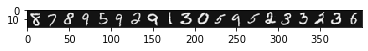

In [8]:
predict_random_images(predictions, x)

# Image Recognition with Neural Network
Using pre-calculated network coefficients.

In [9]:
# load neural network weights
weights = scipy.io.loadmat('../data/ex3weights.mat')
nn_coefficients = (
    weights['Theta1'],  # l1 x (n^2 + 1), where l1 - hidden layer size, n - square image size
    weights['Theta2']   # l2 x (l1 + 1), where l2 - output layer size, l1 - hidden layer size
)

In [10]:
# %load -s predict_digit ../neural_network.py
def predict_digit(layer_coefficients, input_data):
    """
    Predict neural network output for input data with given trained layer coefficients.

    :param layer_coefficients: array of layer coefficients
    :param input_data: input layer data
    :return: index of the max output
    """
    input_data = input_data.reshape(input_data.size, 1)  # n x 1

    for theta in layer_coefficients:
        input_data = sigmoid(np.dot(
            theta,  # l x (n + 1)
            np.vstack([[1], input_data])  # (n + 1) x 1
        ))  # l x 1

    max_index = np.argmax(input_data) + 1

    # data set contains 10 instead of 0
    return max_index if max_index < 10 else 0


In [11]:
# predict images
nn_predictions = [predict_digit(nn_coefficients, image) for image in x]
print_predictions_accuracy(nn_predictions, y)

Prediction accuracy = 97.52%


[9, 4, 4, 0, 6, 5, 2, 3, 2, 2, 4, 9, 4, 7, 7, 3, 7, 8, 1, 4]


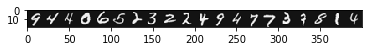

In [12]:
predict_random_images(nn_predictions, x)